# Assignment 3
Mohd Toaha Umar (03708948), Hashir Ahmad (03708887), Rasmus Schamper (03731039), Florian Auinger (03659767)

In [121]:
import numpy as np
import os, imageio
import matplotlib.pyplot as plt

In [122]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

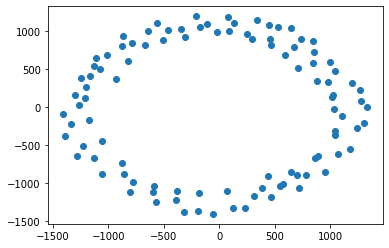

In [126]:
# Insert Code for Subtask 1.1 here
path = 'mnist/'
dir = os.path.join(path, np.random.choice(os.listdir(path)))
images = os.listdir(dir)
X = []
for i, img in enumerate(images):
    X.append(imageio.imread(os.path.join(dir, img)).reshape(-1))
    if i==99:
        break
        
X = np.array(X).reshape(784, 100)
result = linear_pca(X, 2)
plt.scatter(result[0], result[1])
plt.show()

In [127]:
def gram_pca(K,k):
    S, VT = np.linalg.eig(K)
    scores = np.expand_dims(np.sqrt(S[:k]), axis=1)*VT.T[:k,:]
    return scores

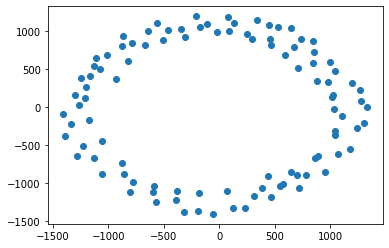

In [128]:
# Insert Code for Subtask 1.3 here
mu = np.mean(X, axis=1)
X_c=X-np.expand_dims(mu,axis=1)
result = gram_pca(np.dot(X_c.T, X_c), 2)
plt.scatter(result[0], result[1])
plt.show()

In [33]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    K = np.exp((-1*(X.T-X)**2)/2*sigma**2)
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

In [129]:
#Insert Code for Subtask 1.5 here
result = gaussian_kernel_pca(X, 2, 1000)
print(result.shape)

ValueError: operands could not be broadcast together with shapes (100,784) (784,100) 